# 데이타 전처리

In [2]:
# 20240701
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

# 데이터 불러와서 합치기
bikes=pd.DataFrame()
for i in range(3):
    bikes_temp = pd.read_csv(f'data\서울특별시 공공자전거 대여정보_201906_{i+1}.csv', encoding='cp949')
    bikes=pd.concat([bikes,bikes_temp])
bikes.isnull().sum()  
bikes['대여일시'] = bikes['대여일시'].astype('datetime64[ms]')  

#파생변수 '요일', '일자', '대여시간대', '주말구분'
요일 = ['월', '화', '수', '목', '금', '토', '일']
bikes['요일'] = bikes['대여일시'].dt.day_of_week.apply(lambda x : 요일[x])
bikes['일자'] = bikes['대여일시'].dt.date
bikes['일자'] = bikes['대여일시'].dt.day
bikes['대여시간대'] = bikes['대여일시'].dt.hour # 대여일시에서 시간을 가져와서 대여시일시로 만들겠다
bikes['주말구분'] = bikes['대여일시'].dt.day_of_week.apply(lambda x : '평일' if x < 5 else '주말')

#위도, 경도 파일 merge
bike_shop = pd.read_csv('data\공공자전거 대여소 정보_23_06.csv', encoding='cp949')
bike_gu = bike_shop[['자치구','대여소번호','보관소(대여소)명','위도','경도']]
bike_gu = bike_gu.rename(columns={'보관소(대여소)명' : '대여소명'})
bikes = pd.merge(bikes,bike_gu, left_on='대여 대여소번호', right_on='대여소번호')
bikes = bikes.drop(['대여소번호','대여소명'],axis=1)
bikes = bikes.rename(columns={'자치구' : '대여구','위도' : '대여점위도','경도' : '대여점경도'})

In [53]:
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,대여구,대여점위도,대여점경도,대여시간대,일자
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,37.561966,127.064506,8,2019-06-03
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,성동구,37.563511,127.056725,8,2019-06-03


#### countplot은 Seaborn 라이브러리에서 제공하는 함수
- 범주형 데이터의 빈도수를 시각화하는 데 사용됩니다. 
- 즉, 특정 카테고리(예: 요일, 성별, 제품 유형 등)가 데이터셋에서 얼마나 자주 나타나는지를 막대그래프로 보여줍니다.

<Axes: xlabel='요일', ylabel='count'>

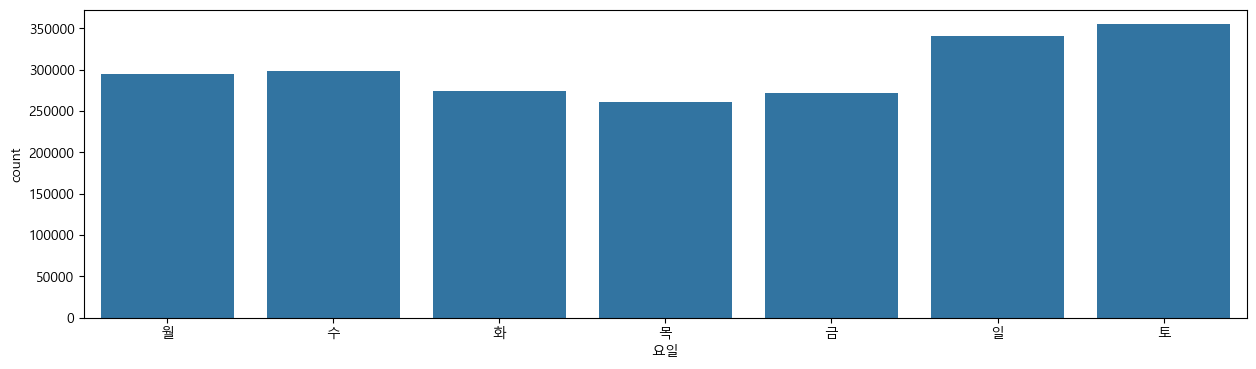

In [51]:
# 시간 개념에 따른 데이터 분석
# 1. 일자별 따릉이 이용건수, 요일별 따릉이 이용건수
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='요일')

<Axes: xlabel='일자', ylabel='count'>

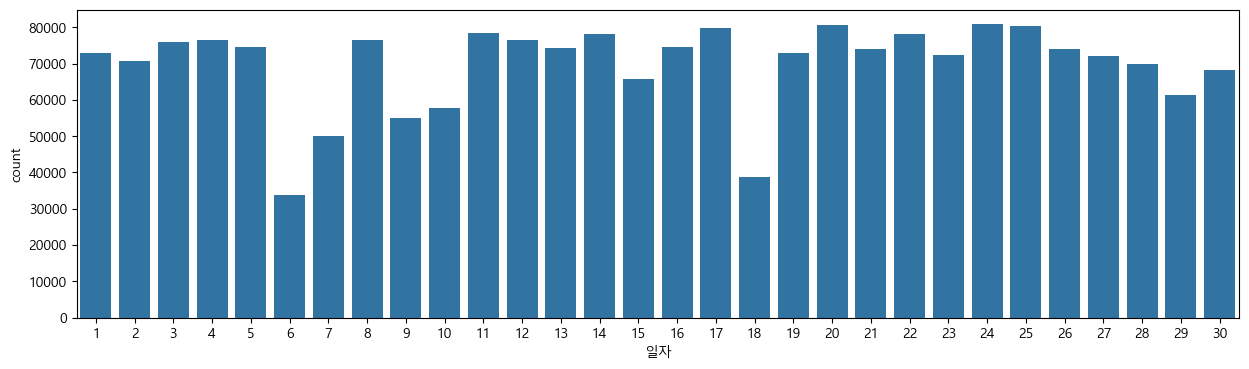

In [4]:
# 2. 일자별 따릉이 이용건수

plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='일자') 

<Axes: xlabel='대여시간대', ylabel='count'>

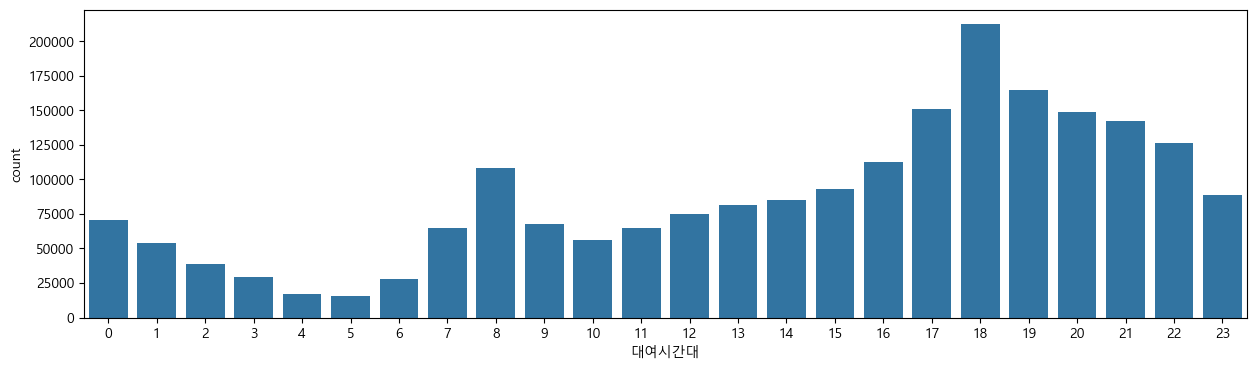

In [5]:
# 3. 대여시간대별 따릉이 이용 건수 

plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='대여시간대') 

In [ ]:
# 4. 대여시간대 & 요일 별 따릉이 이용 건수

# hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count')
# hourly_dayofweek_ride.plot(kind='line', title='대여시간 X 요일 이용 건수', figsize=(15,4));
# # ';' 세미콜론 사용하면 plt.show() 따로 사용 안 해도 됨. line 차트 보여주고 그 다음에 bar 차트 보여줌.
# hourly_dayofweek_ride.plot(kind='bar', title='대여시간 X 요일 이용 건수', figsize=(15,4), rot=0);
# plt.figure(figsize=(15,8))
# sns.heatmap(data=hourly_dayofweek_ride, annot=True, fmt='d')
# plt.show()

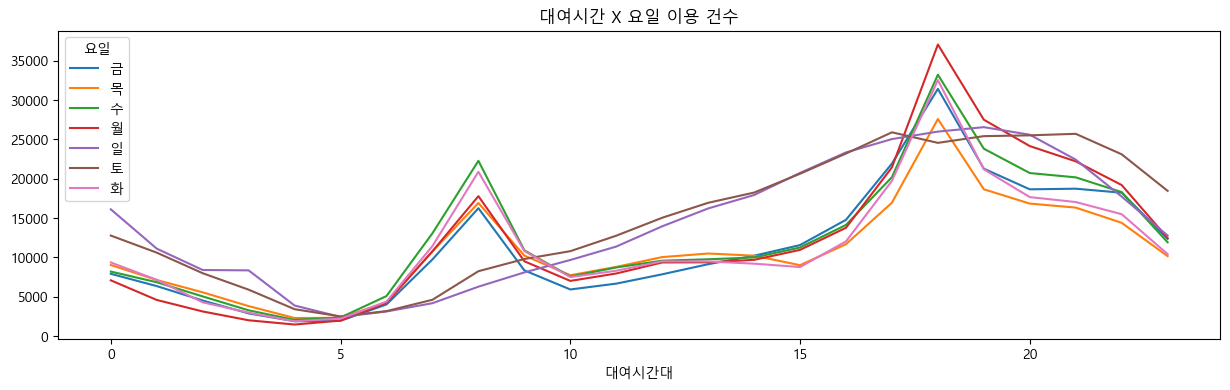

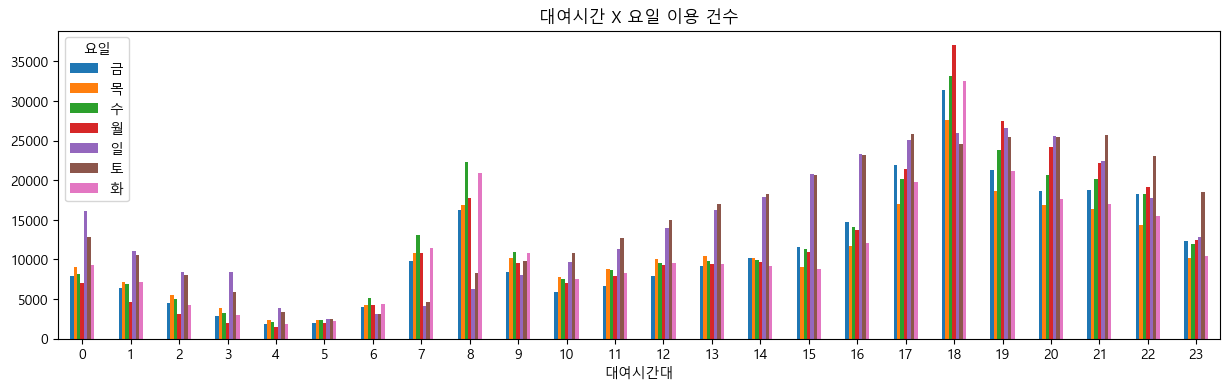

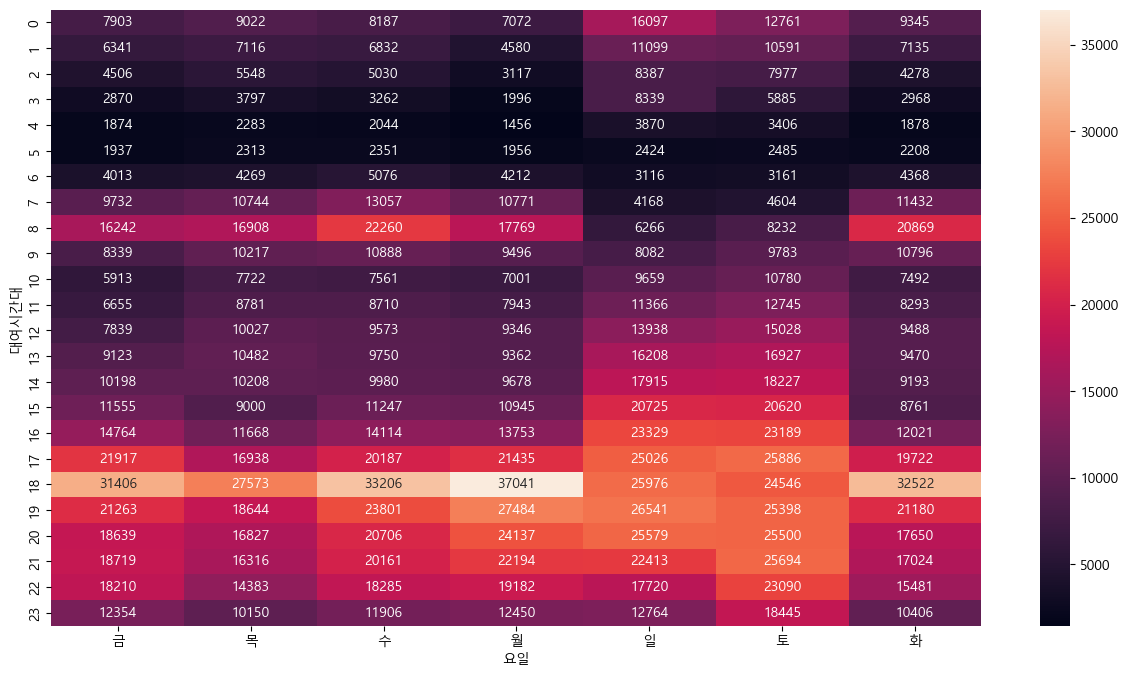

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피벗 테이블 생성
hourly_dayofweek_ride = bikes.pivot_table(
    index='대여시간대',    # 행 인덱스: 대여 시간대
    columns='요일',       # 열 인덱스: 요일
    values='자전거번호',  # 값: 자전거 번호 (카운트할 값)
    aggfunc='count'       # 집계 함수: 카운트 (대여 건수)
)

# 선 그래프 (Line Chart) 그리기
hourly_dayofweek_ride.plot(kind='line', title='대여시간 X 요일 이용 건수', figsize=(15, 4));  #  ';' 세미콜론을 사용하면 plt.show()를 생략해도 그래프가 표시됩니다.

# 막대 그래프 (Bar Chart) 그리기
hourly_dayofweek_ride.plot(kind='bar', title='대여시간 X 요일 이용 건수', figsize=(15, 4), rot=0);
# rot=0: x축의 레이블을 수평으로 표시

# 히트맵 (Heatmap) 그리기
plt.figure(figsize=(15, 8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True, fmt='d')
# annot=True: 각 셀에 값을 표시
# fmt='d': 정수 형식으로 표시

# 그래프 보여주기
plt.show()


In [7]:
# 5. 대여시간대 x 주말구분 따릉이 이용건수

hourly_week_ride = bikes.pivot_table(index='대여시간대', columns='주말구분', values='자전거번호', aggfunc='count')

In [8]:
bikes.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리', '요일', '일자', '대여시간대', '주말구분', '대여구',
       '대여점위도', '대여점경도'],
      dtype='object')

In [9]:
hourly_week_ride.head(3)

주말구분,주말,평일
대여시간대,,
0,28858,41529
1,21690,32004
2,16364,22479


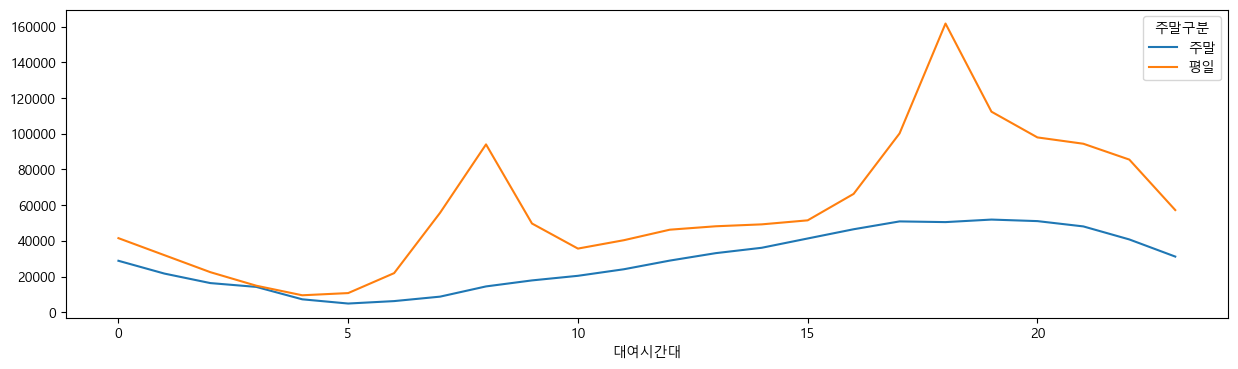

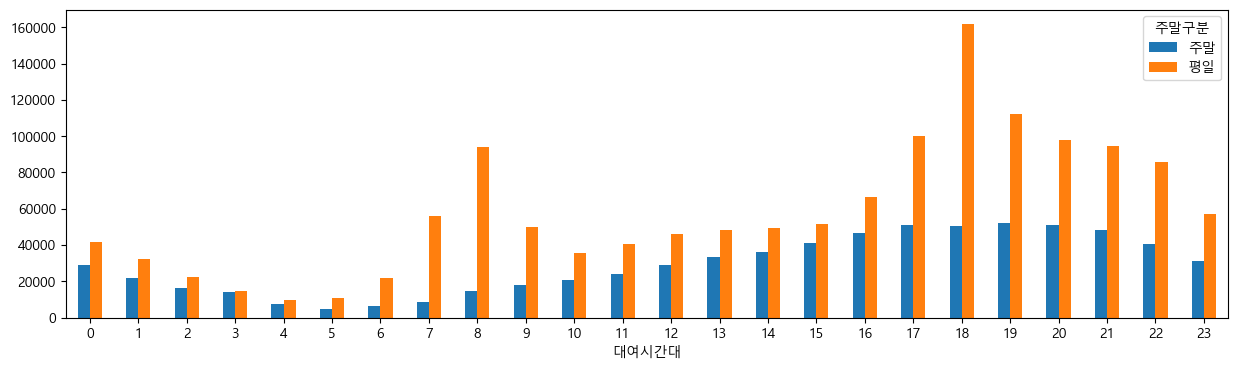

In [10]:
# pandas의 plot 메서드 
# df.plot() 사용

hourly_week_ride.plot(kind='line', figsize=(15,4));
hourly_week_ride.plot(kind='bar', figsize=(15,4), rot=0); # rot=0: x축 레이블을 수평으로 표시

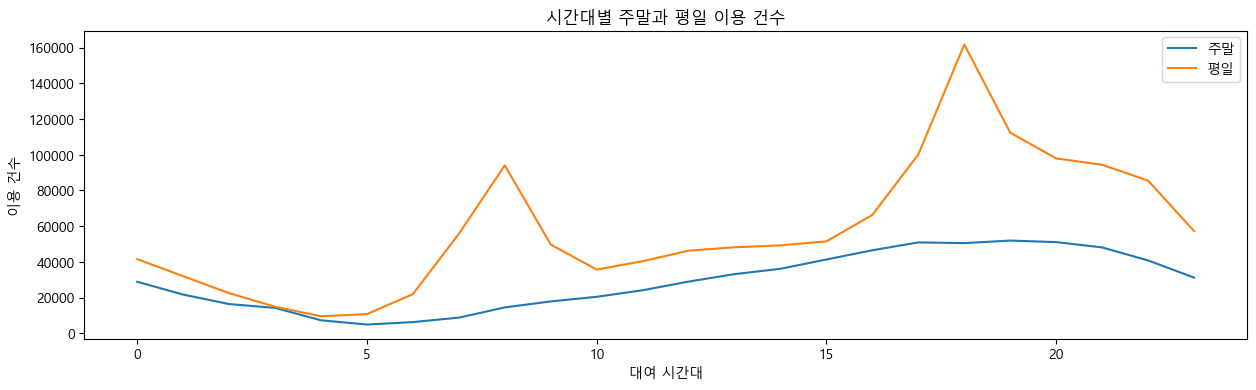

In [60]:
# matplotlib의 plot 함수

plt.figure(figsize=(15,4))
plt.plot(hourly_week_ride.index, hourly_week_ride['주말'], label ='주말')
plt.plot(hourly_week_ride.index, hourly_week_ride['평일'], label ='평일')

plt.title('시간대별 주말과 평일 이용 건수')
plt.xlabel('대여 시간대')
plt.ylabel('이용 건수')
# 범례 추가
plt.legend() 
# 그래프 보여주기
plt.show()

<Axes: xlabel='대여시간대', ylabel='이용시간'>

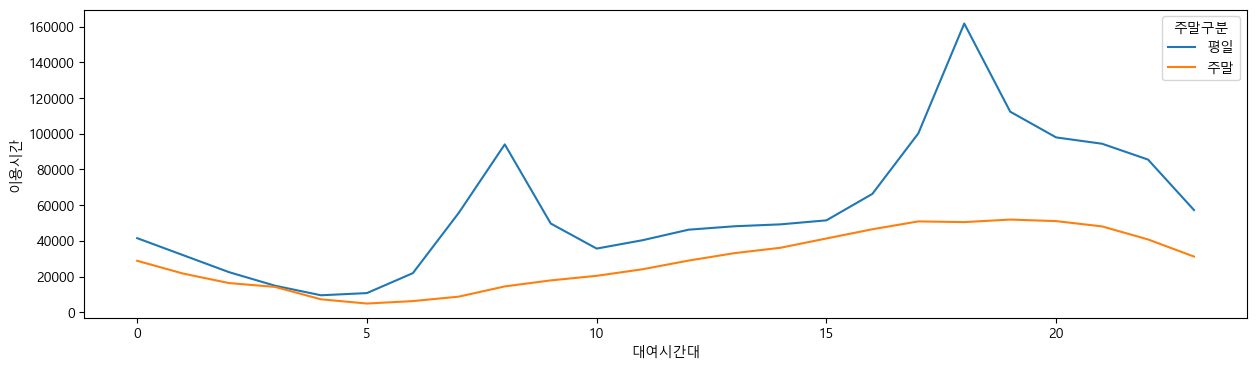

In [12]:
# seaborn은 matplotlib 기반의 고수준 시각화 라이브러리로, 통계 그래프를 쉽게 그릴 수 있게 해줍니다.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# lineplot은 시간에 따른 데이터 변화나 두 변수 간의 관계를 시각화할 때 유용
plt.figure(figsize=(15,4))
sns.lineplot(data = bikes, 
             x ='대여시간대', y='이용시간', 
             hue ='주말구분',  # hue='주말구분'은 '주말구분' 열을 기준으로 데이터 시리즈를 색상으로 구분합니다. 예를 들어, 주말과 평일 데이터를 다른 색상으로 표시하여 비교할 수 있게 합니다.
             estimator ='count', errorbar = None # 각 대여시간대에 대한 이용 건수(횟수)를 계산 # errorbar=None: 에러바를 표시하지 않습니다.
             ) 

# 주말과 평일에 따른 대여 시간대별 이용 건수(또는 횟수)를 시각화

<Axes: xlabel='대여시간대', ylabel='count'>

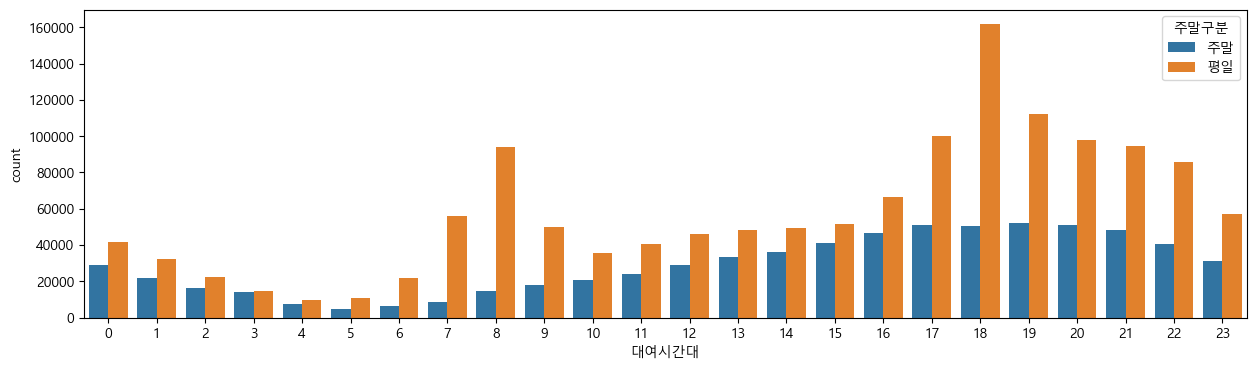

In [13]:
# plt.figure(figsize=(15,4))
# sns.countplot(data = bikes, x ='대여시간대', y='이용시간') 
# seaborn 이용 

plt.figure(figsize=(15,4)) 
sns.countplot(data = bikes, x='대여시간대', hue = '주말구분') 

# 끝

In [61]:
# 따릉이....20240628 

import pandas as pd

pd.read_csv("data\서울특별시 공공자전거 대여정보_201906_1.csv", encoding='cp949')


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0
...,...,...,...,...,...,...,...,...,...,...,...
799955,SPB-22522,2019-06-01 17:47:47,726,목동3단지 시내버스정류장,6,2019-06-01 18:44:20,735,영도초등학교,5,52,2020.0
799956,SPB-01434,2019-06-01 17:49:18,735,영도초등학교,1,2019-06-01 18:55:01,735,영도초등학교,2,65,7990.0
799957,SPB-18503,2019-06-01 17:48:02,735,영도초등학교,8,2019-06-01 18:55:29,735,영도초등학교,4,66,7910.0
799958,SPB-19656,2019-06-01 18:55:01,762,오목로 무중력지대 앞,1,2019-06-01 19:08:12,735,영도초등학교,10,13,2120.0


In [15]:
# 반복문으로 파일 자동으로 받아오기

for i in range(3) :
    print(f"data\서울특별시 공공자전거 대여정보_201906_{i+1}.csv")
    

data\서울특별시 공공자전거 대여정보_201906_1.csv
data\서울특별시 공공자전거 대여정보_201906_2.csv
data\서울특별시 공공자전거 대여정보_201906_3.csv


In [16]:
bikes = pd.DataFrame()
for i in range(3) :
    # bikes_temp = pd.read_csv(f"data\서울특별시 공공자전거 대여정보_201906_{i+1}.csv" encoding='cp949')
    bikes_temp = pd.read_csv(f"data\서울특별시 공공자전거 대여정보_201906_{i+1}.csv", encoding='cp949')

    bikes = pd.concat([bikes,bikes_temp])

bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0


In [17]:
print(bikes.info())
print(bikes.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2215632 entries, 0 to 615720
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   int64  
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      int64  
 10  이용거리      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 202.8+ MB
None
자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64


In [18]:
# 데이터 확인해보기
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0


In [19]:
# 기초 통계 확인, 데이터의 전반적인 분포와 중요한 통계적 특성을 간단히 파악
bikes.describe() # 표준편차(std): 각 열의 데이터가 평균에서 얼마나 퍼져 있는지를 나타내는 지표입니다.

,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06
mean,1.226154e+03,7.014750e+00,1.228354e+03,6.967391e+00,2.716998e+01,3.912916e+03
std,8.499197e+02,5.244626e+00,8.462296e+02,5.238154e+00,2.908119e+01,5.145471e+03
min,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.050000e+02,3.000000e+00,5.120000e+02,3.000000e+00,8.000000e+00,1.220000e+03
50%,1.159000e+03,6.000000e+00,1.159000e+03,6.000000e+00,1.700000e+01,2.270000e+03
75%,1.846000e+03,1.000000e+01,1.839000e+03,1.000000e+01,3.700000e+01,4.670000e+03
max,9.998000e+03,4.000000e+01,9.998000e+03,4.000000e+01,3.133000e+03,2.323100e+05


In [20]:
# 대여일시 object를 datetime 형식으로 바꾸자

bikes['대여일시'] = bikes['대여일시'].astype('datetime64[ms]') 

In [21]:
print(bikes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2215632 entries, 0 to 615720
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ms]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   int64         
 7   반납대여소명    object        
 8   반납거치대     int64         
 9   이용시간      int64         
 10  이용거리      float64       
dtypes: datetime64[ms](1), float64(1), int64(5), object(4)
memory usage: 202.8+ MB
None


In [22]:
# bikes 데이터프레임에서 '대여일시' 열을 기반으로 요일별 따릉이 이용시간을 분석하기 위한 전처리 과정을 수행하는 예시

# 연도, 일자, 요일 정보 추출
bikes['대여일시'].dt.year
bikes['대여일시'].dt.day
bikes['대여일시'].dt.day_of_week # bikes에 '요일'을 하나 만듬- 숫자로 나오면 안되고 월화수목으로 나오게..

# apply라는 메소드로 만들것인데 이것은 함수를 실행시켜주는 함수이다.  

0         0
1         0
2         2
3         2
4         0
         ..
615716    0
615717    1
615718    2
615719    3
615720    4
Name: 대여일시, Length: 2215632, dtype: int32

### apply 함수 이해
- apply(사용자 정의 함수), apply(람다식)

In [23]:
# 주어진 데이터프레임에서 각 열의 값에 함수를 적용하여 변환하는 예시
# 
# 데이타프래임 만들어보자
import pandas as pd

df = pd.DataFrame([[4, 9], [1, 4], [5, 6]], columns=['A', 'B'])
print(df)


# 함수 정의 및 apply 메서드 사용

# 임의값 입력 받아 1 증가 후 결과 리턴하는 함수
def plus_one(x):
    x += 1
    return x

# apply 메서드를 사용하여 각 열에 plus_one 함수 적용
df['A'].apply(plus_one)  # apply 메서드는 데이터프레임의 열에 함수를 적용하는 메서드
df['B'].apply(plus_one)

# 'A' 열의 각 원소에 plus_one 함수를 적용하여 1을 증가시킨 결과를 반환합니다.

   A  B
0  4  9
1  1  4
2  5  6


0    10
1     5
2     7
Name: B, dtype: int64

In [64]:
# 람다 함수를 사용하여 각 열에 1을 더한 결과를 반환
df['A'].apply(lambda x : x + 1)
df['B'].apply(lambda x : x + 1) 

# lambda x: x + 1은 입력 x에 대해 x + 1을 계산하여 반환하는 함수

Object `lambda` not found.


- 요일 파생 변수를 생성 : 월, 화, 수 .... 일

In [25]:
# 대여일시 
# bikes['대여일시'].dt.day_of_week # dtype 숫자로 나옴

# 요일을 담을 리스트 하나 만들어 보자, 인덱스는 0부터 시작
요일 = ['월','화','수','목','금','토','일']

# 요일[0] # day of week가 저부분에 들가면 되겠네요
# 요일을 불러 오는 식을 만들자구요
bikes['요일'] = bikes['대여일시'].dt.day_of_week.apply(lambda x : 요일[x])



In [26]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0,수
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0,수
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0,월


## 위도 경도가 있는 데이타

In [27]:
# C:\Users\USER\Documents\GitHub\msAISchool4\BIKES\data\공공자전거 대여소 정보_23_06.csv 가공한 파일임
# csv 파일을 가져오기

bike_shop = pd.read_csv("data\공공자전거 대여소 정보_23_06.csv", encoding='cp949')

bike_shop

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,11.0,11.0,QR
...,...,...,...,...,...,...,...,...,...,...
2744,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.556553,127.165878,2022-06-21,NaN,15.0,QR
2745,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.548164,127.122574,2022-07-08,NaN,8.0,QR
2746,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022-10-12,NaN,8.0,QR
2747,4951,강동농협 버스정류소 앞(광채빌라),강동구,강동구 암사동 488-21,37.547966,127.135162,2022-09-29,NaN,5.0,QR


In [28]:
bike_shop.columns

Index(['대여소번호', '보관소(대여소)명', '자치구', '상세주소', '위도', '경도', '설치시기', 'LCD', 'QR',
       '운영방식'],
      dtype='object')

In [29]:
# 필요한 컬럼만 가져오고, 순서도 조금 바꾸어 준다. (전처)
bike_gu = bike_shop[['자치구', '대여소번호', '보관소(대여소)명', '위도', '경도']]

In [30]:
bike_gu.head()

,자치구,대여소번호,보관소(대여소)명,위도,경도
0,종로구,301,경복궁역 7번출구 앞,37.575794,126.971451
1,종로구,302,경복궁역 4번출구 뒤,37.575947,126.974060
2,종로구,303,광화문역 1번출구 앞,37.571770,126.974663
3,종로구,305,종로구청 옆,37.572559,126.978332
4,종로구,307,서울역사박물관 앞,37.570000,126.971100


In [31]:
bike_gu = bike_gu.rename(columns={'보관소(대여소)명' : '대여소명'})
bike_gu.head()

,자치구,대여소번호,대여소명,위도,경도
0,종로구,301,경복궁역 7번출구 앞,37.575794,126.971451
1,종로구,302,경복궁역 4번출구 뒤,37.575947,126.974060
2,종로구,303,광화문역 1번출구 앞,37.571770,126.974663
3,종로구,305,종로구청 옆,37.572559,126.978332
4,종로구,307,서울역사박물관 앞,37.570000,126.971100


In [32]:
bike_gu.head()

,자치구,대여소번호,대여소명,위도,경도
0,종로구,301,경복궁역 7번출구 앞,37.575794,126.971451
1,종로구,302,경복궁역 4번출구 뒤,37.575947,126.974060
2,종로구,303,광화문역 1번출구 앞,37.571770,126.974663
3,종로구,305,종로구청 옆,37.572559,126.978332
4,종로구,307,서울역사박물관 앞,37.570000,126.971100


In [33]:
bikes.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월


In [34]:
bikes = pd.merge(bikes, bike_gu, left_on='대여 대여소번호',  right_on='대여소번호')
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,자치구,대여소번호,대여소명,위도,경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,646,장한평역 1번출구,37.561966,127.064506
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,성동구,526,용답토속공원 앞,37.563511,127.056725


In [35]:
# 요일 뒤에 들어가 있는 것을 확인해 볼 수 있다. 

# 그런데 중복데이터가 있다. 버려버리도록 하다. drop

bikes = bikes.drop(['대여소번호', '대여소명'], axis=1)

In [36]:
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,자치구,위도,경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,37.561966,127.064506
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,성동구,37.563511,127.056725


In [37]:
# ‘자치구’, ‘위도’, '경도’라는 이름의 컬럼을 각각 ‘대여구’, ‘대여점위도’, '대여점경도’라는 이름으로 변경
bikes = bikes.rename(columns={'자치구' : '대여구','위도' : '대여점위도','경도' : '대여점경도'})
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,대여구,대여점위도,대여점경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,37.561966,127.064506
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,성동구,37.563511,127.056725
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0,수,동대문구,37.561966,127.064506
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0,수,동대문구,37.561966,127.064506
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0,월,성동구,37.561371,127.063660


### 대여시간대별, 요일별, 대여건수
- 피봇테이블


In [38]:
bikes['대여시간대'] = bikes['대여일시'].dt.hour # 대여일시에서 시간을 가져와서 대여시일시로 만들겠다

bikes

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,대여구,대여점위도,대여점경도,대여시간대
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,37.561966,127.064506,8
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,성동구,37.563511,127.056725,8
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0,수,동대문구,37.561966,127.064506,8
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.0,수,동대문구,37.561966,127.064506,8
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.0,월,성동구,37.561371,127.063660,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095740,SPB-22438,2019-06-24 07:40:39,240,문래역 4번출구 앞,8,2019-06-24 07:54:16,9998,영남주차장 정비센터,10,13,900.0,월,영등포구,37.518738,126.895577,7
2095741,SPB-24455,2019-06-25 07:34:58,240,문래역 4번출구 앞,7,2019-06-25 07:42:14,9998,영남주차장 정비센터,4,6,880.0,화,영등포구,37.518738,126.895577,7
2095742,SPB-24557,2019-06-26 08:19:57,240,문래역 4번출구 앞,4,2019-06-26 08:27:49,9998,영남주차장 정비센터,10,7,930.0,수,영등포구,37.518738,126.895577,8
2095743,SPB-00649,2019-06-27 07:38:12,240,문래역 4번출구 앞,9,2019-06-27 07:49:52,9998,영남주차장 정비센터,10,11,1030.0,목,영등포구,37.518738,126.895577,7


In [39]:
import warnings
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings('ignore') 

In [40]:
### pivot_table

hourl_dayofweek_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc=['count'])

# 피봇테이블 생성
요일순서 = ['월','화','수','목','금','토','일']

hourl_dayofweek_ride = bikes.pivot_table(index='대여시간대',columns='요일', values='이용시간', aggfunc='count').reindex(요일순서, axis=1)

<Axes: title={'center': '대여시간 * 요일 이용건수'}, xlabel='대여시간대'>

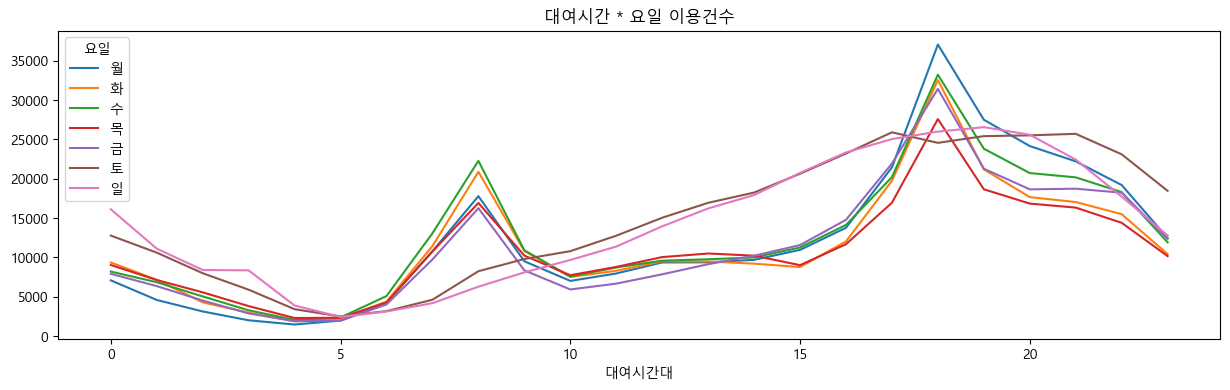

In [41]:

hourl_dayofweek_ride.plot(kind='line', title='대여시간 * 요일 이용건수', figsize=(15,4))
# bikes.pivot_table(index='대여시간대', columns='요일', values='이용시간', aggfunc=['count','mean'])


<Axes: title={'center': '대여시간 * 요일 이용건수'}, xlabel='대여시간대'>

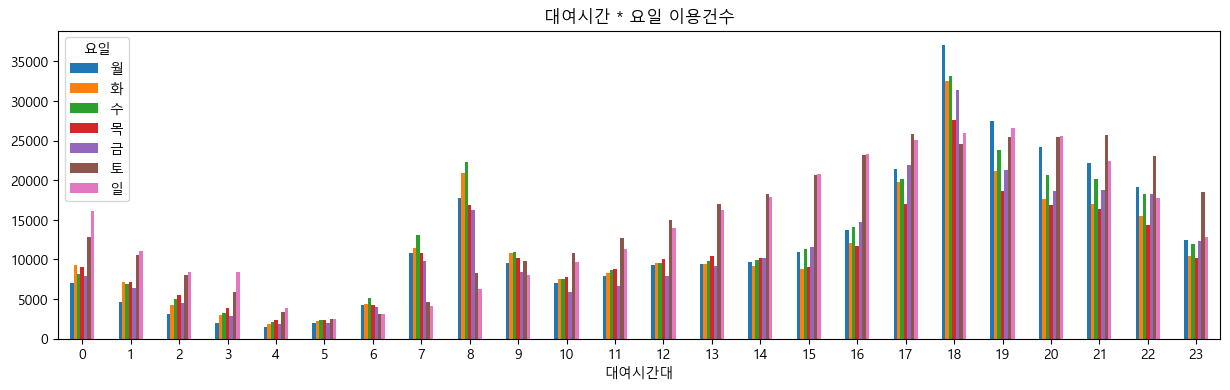

In [42]:
# bar로 바꿔보기

hourl_dayofweek_ride.plot(kind='bar', title='대여시간 * 요일 이용건수', figsize=(15,4), rot=0)


<Axes: xlabel='요일', ylabel='대여시간대'>

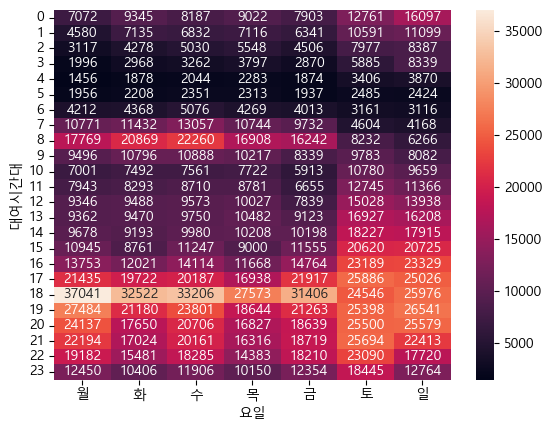

In [43]:
import seaborn as sns

sns.heatmap(data=hourl_dayofweek_ride, annot=True, fmt='d')

In [44]:
bikes['요일'].value_counts() # 밸류카운트로 하면 숫자  bar 그래프를 만들땐 이걸 해야하고,이걸필요없이 하려면 아래....훨씬펴함


요일
토    354960
일    341007
수    298174
월    294376
화    273980
금    272312
목    260936
Name: count, dtype: int64

<Axes: xlabel='요일', ylabel='count'>

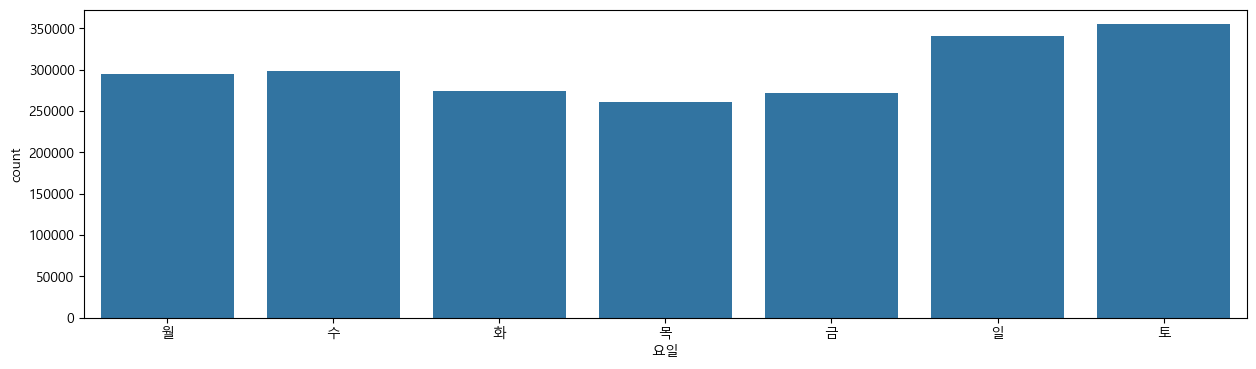

In [45]:
# 요일 별 이용 건수를 분석
import seaborn as sns

plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='요일') # 집계하지 않았는데 요일별로 그려진다.

<Axes: xlabel='일자', ylabel='count'>

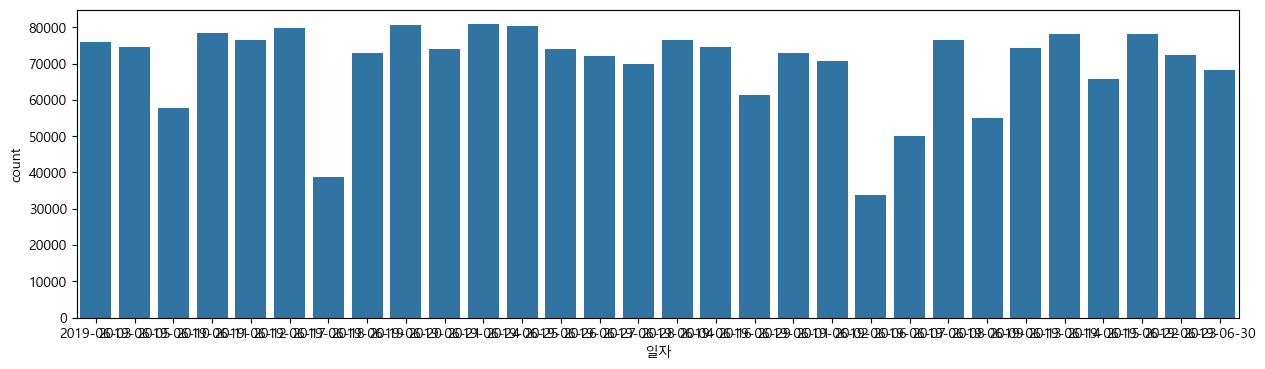

In [46]:
# 일자 별로 그려보기

# 일자가 없다.

bikes['일자'] = bikes['대여일시'].dt.date


plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='일자') 


<Axes: xlabel='대여시간대', ylabel='count'>

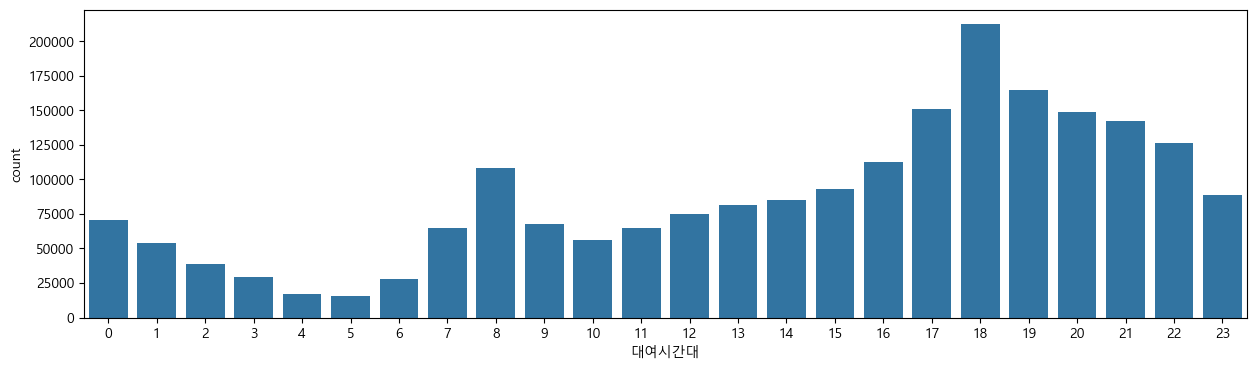

In [47]:
# 대여시간 별로 그려보기

plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='대여시간대') 

In [48]:
bikes.dtypes

자전거번호               object
대여일시        datetime64[ms]
대여 대여소번호             int64
대여 대여소명             object
대여거치대                int64
반납일시                object
반납대여소번호              int64
반납대여소명              object
반납거치대                int64
이용시간                 int64
이용거리               float64
요일                  object
대여구                 object
대여점위도              float64
대여점경도              float64
대여시간대                int32
일자                  object
dtype: object